In [21]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [22]:
class FNN(nn.Module):
    def __init__(self,n,site):
        super(FNN, self).__init__()

        self.fnn = nn.Sequential(nn.Linear(n,site * 3))
        self.m = site
    def forward(self,x):
        y = self.fnn(x)
        y = y.reshape(-1,self.m, 3)
        return y/torch.norm(y,dim = 2,keepdim = True)

    def __del__(self):
      print("net deleted")

In [23]:
def loss(x,J,field):
  batch = x.shape[0]
  x_hat = pad(x.detach().clone())
  left = x_hat[:,0:-2,:]
  right = x_hat[:,2::,:]

  neighbor = left+right
  #print(neighbor.shape)

  return (torch.mean(x@field) + torch.mean((x * neighbor) ) * J *3/2)

In [24]:
def load_array(n, batch_size, num):
  mat = torch.rand(num,n)
  dataset = TensorDataset(mat)
  train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
  return train_loader

In [25]:
n = 10
batch_size = 50
example_num = 10000
data_iter = load_array(n,batch_size,example_num)

site_num = 3
J = 1

In [26]:
pad = nn.ConstantPad2d((0,0,1,1),0)
epochs = 8

In [27]:
def train(net,field):
  trainer = torch.optim.Adam(net.parameters(),lr =0.1)
  net.train()
  for epoch in range(epochs):
    for _, (X,) in enumerate(data_iter):
      l = loss(net(X),J,field)
      trainer.zero_grad()
      l.backward()
      trainer.step()
    l = loss(net(X),J,field)
    if epoch  == 7:
      print(f'epoch {epoch + 1}, loss {l*site_num:f}')

  #return l

In [28]:
def mz(net):
  net.eval()
  for _, (X,) in enumerate(data_iter):
      y = net(X)
      break
  return torch.mean(net(X)[0,:,0]).detach().numpy()

In [29]:
def loop():
  MAX = 3
  step = 0.2
  N = int(MAX/step)
  mag = np.zeros(2*N)
  
  for i in range(2*N):
    field = torch.tensor([float(- MAX + i*step),0.,0.])
    net = FNN(n,site = site_num)
    train(net,field)
    mag[i] = mz(net)
  del net

  return mag

In [30]:
magnet = loop()

epoch 8, loss -7.000000
net deleted
epoch 8, loss -6.399999
net deleted
epoch 8, loss -5.799999
net deleted
epoch 8, loss -5.200000
net deleted
epoch 8, loss -4.600000
net deleted
epoch 8, loss -4.000000
net deleted
epoch 8, loss -3.400002
net deleted
epoch 8, loss -2.800016
net deleted
epoch 8, loss -2.500076
net deleted
epoch 8, loss -2.499951
net deleted
epoch 8, loss -2.500008
net deleted
epoch 8, loss -2.500108
net deleted
epoch 8, loss -2.500020
net deleted
epoch 8, loss -2.399970
net deleted
epoch 8, loss -2.199999
net deleted
epoch 8, loss -1.999999
net deleted
epoch 8, loss -2.199992
net deleted
epoch 8, loss -2.399973
net deleted
epoch 8, loss -2.500092
net deleted
epoch 8, loss -2.499982
net deleted
epoch 8, loss -2.499910
net deleted
epoch 8, loss -2.499986
net deleted
epoch 8, loss -2.500140
net deleted
epoch 8, loss -2.800013
net deleted
epoch 8, loss -3.400002
net deleted
epoch 8, loss -4.000000
net deleted
epoch 8, loss -4.600000
net deleted
epoch 8, loss -5.200000
net 

net deleted


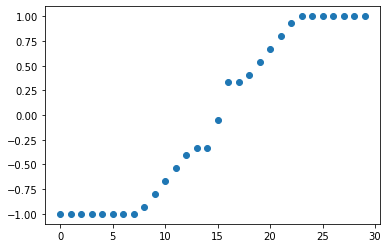

In [31]:
plt.plot(-magnet,'o')
plt.show()